In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
    
df = pd.read_csv("aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [3]:
df.shape

(180, 9)

In [4]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [5]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [6]:
df.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# Adding coloumn for price of product for corelation analysis

In [7]:
def price(df):
    if df == "KP281":
        return 1500
    elif df == "KP481":
        return 1750
    else:
        return 2500
df["Product_price"] = df["Product"].apply(price)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   Product_price  180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


<Axes: >

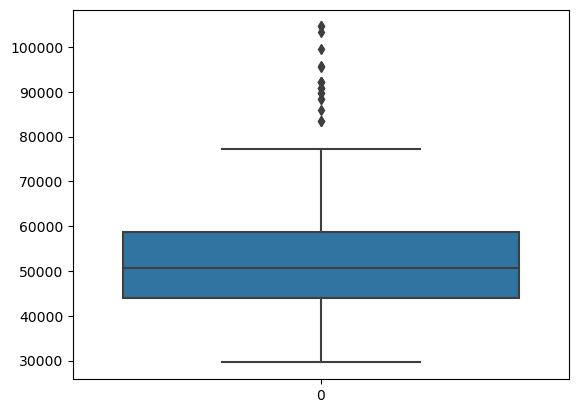

In [8]:
sns.boxplot(data = df["Income"])

<Axes: xlabel='Income', ylabel='Count'>

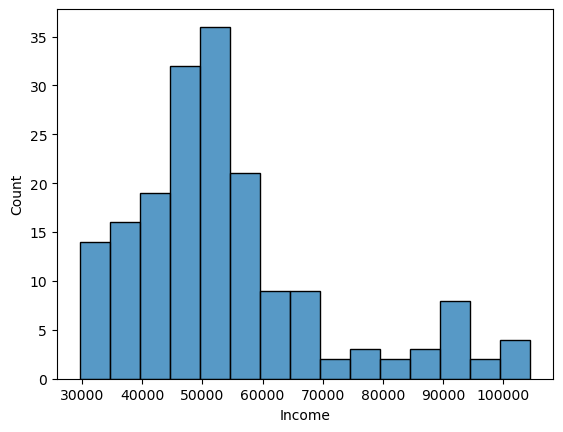

In [9]:
sns.histplot(df["Income"])

In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


In [11]:
bin1 = [29500,44000,52000,80000,105000]
label1 = ["Income_low","Income_mid","Income_high","Income_rich"]
df["Income_range"] = pd.cut(df["Income"],bins = bin1,labels=label1 )
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Income_range
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Income_low
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Income_low
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Income_low
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Income_low
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Income_low
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,Income_rich
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Income_rich
177,KP781,45,Male,16,Single,5,5,90886,160,2500,Income_rich
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,Income_rich


<Axes: xlabel='Product', ylabel='count'>

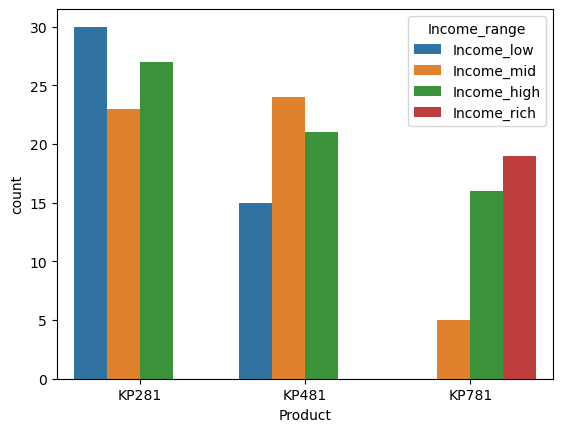

In [12]:
sns.countplot(df,x="Product",hue="Income_range")

If the person is rich(income > 80000) recommend KP781 regardless of his age, martialStatus or any other features

If the Person is low (income < 44000) recommend KP281 on priority basis and later on recommend KP481 and try not to recommend KP781

<Axes: xlabel='Age', ylabel='Count'>

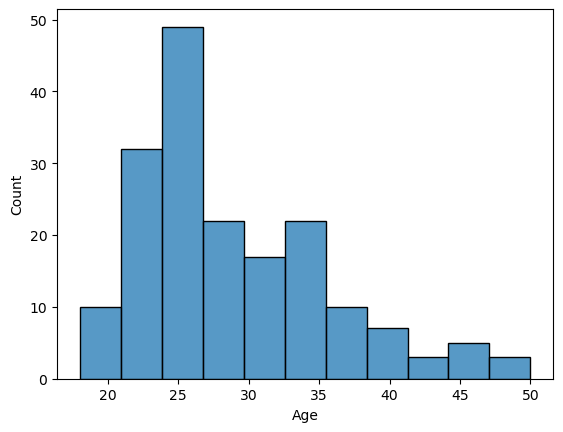

In [13]:
sns.histplot(df["Age"])

# Age Binning

In [14]:
bin2 = [17,25,35,50]
label2 = ["Young","Mid_age","Adult"]
df["Age_group"] = pd.cut(df["Age"],bins = bin2,labels=label2 )
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Income_range,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Income_low,Young
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Income_low,Young
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Income_low,Young
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Income_low,Young
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Income_low,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,Income_rich,Adult
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Income_rich,Adult
177,KP781,45,Male,16,Single,5,5,90886,160,2500,Income_rich,Adult
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,Income_rich,Adult


In [15]:
# df.describe()

# Binning fitness coloumn for anallysis

In [16]:
df['fitness_group'] = pd.cut(df['Fitness'],bins=[0,2,3,5],labels=['poor','medium','good'])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Income_range,Age_group,fitness_group
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Income_low,Young,good
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Income_low,Young,medium
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Income_low,Young,medium
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Income_low,Young,medium
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Income_low,Young,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,Income_rich,Adult,good
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Income_rich,Adult,good
177,KP781,45,Male,16,Single,5,5,90886,160,2500,Income_rich,Adult,good
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,Income_rich,Adult,good


# Binning Usage coloumn for anallysis

In [17]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [18]:
df['usage_group']=pd.cut(df['Usage'],bins=[1,3,5,7],labels=['Usage2&3','Usage4&5','Usage6&7'])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Income_range,Age_group,fitness_group,usage_group
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Income_low,Young,good,Usage2&3
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Income_low,Young,medium,Usage2&3
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Income_low,Young,medium,Usage4&5
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Income_low,Young,medium,Usage2&3
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Income_low,Young,poor,Usage4&5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,Income_rich,Adult,good,Usage6&7
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Income_rich,Adult,good,Usage4&5
177,KP781,45,Male,16,Single,5,5,90886,160,2500,Income_rich,Adult,good,Usage4&5
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,Income_rich,Adult,good,Usage4&5


# Binning Education

In [19]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [20]:
df['education_group'] = pd.cut(df['Education'],bins=[11,15,18,22],labels=['Graduation','Masters','Phd'])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Income_range,Age_group,fitness_group,usage_group,education_group
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Income_low,Young,good,Usage2&3,Graduation
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Income_low,Young,medium,Usage2&3,Graduation
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Income_low,Young,medium,Usage4&5,Graduation
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Income_low,Young,medium,Usage2&3,Graduation
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Income_low,Young,poor,Usage4&5,Graduation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,Income_rich,Adult,good,Usage6&7,Phd
176,KP781,42,Male,18,Single,5,4,89641,200,2500,Income_rich,Adult,good,Usage4&5,Masters
177,KP781,45,Male,16,Single,5,5,90886,160,2500,Income_rich,Adult,good,Usage4&5,Masters
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,Income_rich,Adult,good,Usage4&5,Masters


In [21]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

<Axes: xlabel='Product', ylabel='count'>

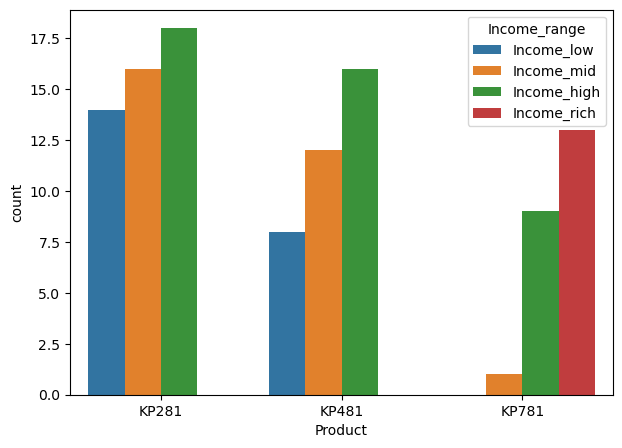

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(data=df[df["MaritalStatus"] == "Partnered"],x="Product",hue="Income_range")

#### Married people generally prefered KP281 product except rich people

<Axes: xlabel='Product', ylabel='count'>

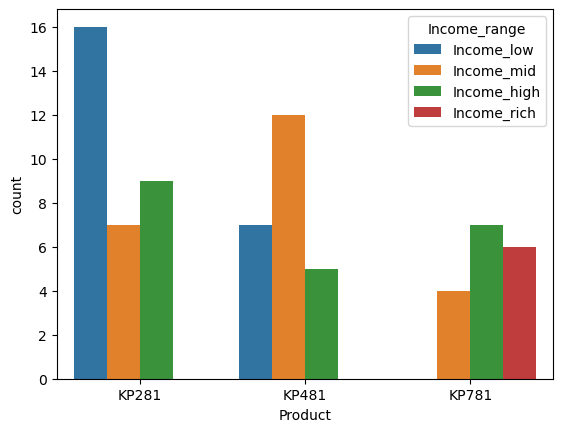

In [23]:
sns.countplot(data=df[df["MaritalStatus"] == "Single"],x="Product",hue="Income_range")

#### The above graph shows that - Unmarried people preference depends on two factor product price and their income, as both of these features are positively corelated

#### Hence, there is a high probability of unmarried people to buy Kp281 who has low income, kp481 who has mid income, kp781 who falls in the rich category.

In [24]:
Gender_usage = df.groupby(df["Gender"]).agg({"Usage":"sum"})
Gender_usage

,Usage
Gender,
Female,242
Male,380


<Axes: xlabel='Product', ylabel='count'>

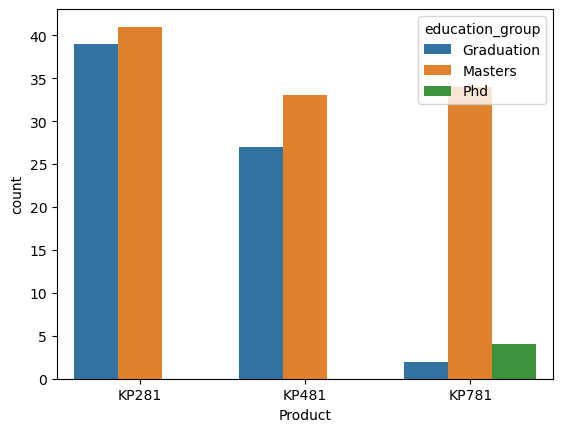

In [25]:
sns.countplot(data=df,x="Product",hue="education_group")

#### People who are doing graduation or masters are Purchasing KP281 and KP481 Product

#### People who are doing masters are purchasing any kind of product

<Axes: xlabel='Product', ylabel='count'>

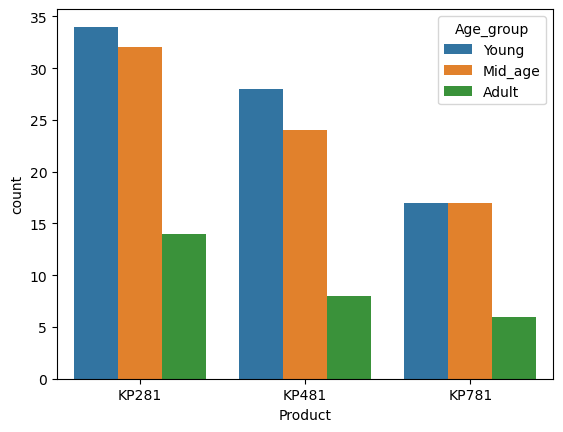

In [26]:
sns.countplot(data=df , x = 'Product' , hue='Age_group')

#### people who are young and mid-age generally use KP281 and KP481 product

# heat map

C:\Users\user\AppData\Local\Temp\ipykernel_20108\1083020458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


<Axes: >

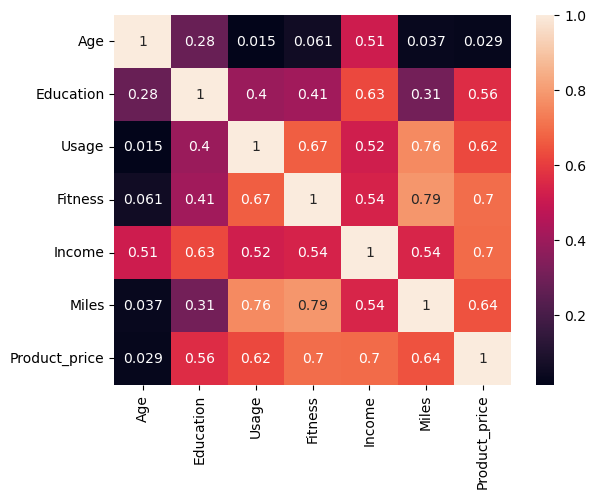

In [27]:
sns.heatmap(data=df.corr(), annot=True)


**Education and income** are more correlated than **age and income** on the other hand **age and education** are not well correlated with each other and we all know that **income and product price** are highly correlated



**Hence, if User's age & education both are higher then recommend him KP781**

In [28]:
pd.crosstab(index=df['Product'],columns=df["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Product,,,,
KP281,44.444444,0.000000,0.000000,44.444444
KP481,0.000000,33.333333,0.000000,33.333333
KP781,0.000000,0.000000,22.222222,22.222222
All,44.444444,33.333333,22.222222,100.000000


## Product KP281 has 45% chance to sold to a random User
## Product KP481 has 33% chance to sold to a random User
## Product KP781 has 22% chance to sold to a random User

In [45]:
pd.crosstab(index=df['Gender'],columns=df["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [30]:
pd.crosstab(index=df["education_group"],columns=df["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
education_group,,,,
Graduation,21.666667,15.000000,1.111111,37.777778
Masters,22.777778,18.333333,18.888889,60.000000
Phd,0.000000,0.000000,2.222222,2.222222
All,44.444444,33.333333,22.222222,100.000000


#### Probablity of a Graduation(Education from 11 to 15 years) student buying KP281 is -> 15.00%

## Conditional Probability

In [31]:
pd.crosstab(index=df['Gender'],columns=df["Product"],margins=True,normalize="index")*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


#### What is the probability of a person buying KP481 given that its a Female - 38.16% --> P(KP481 | Female)
#### What is the probability fo a person buying KP781 given that its a Male - 37.73% --> P(KP781 | Male)

In [32]:
pd.crosstab(index=df['Gender'],columns=df["Product"],margins=True,normalize="columns")*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


#### What is the probability of a Female person buying Product given that its a KP481 - 48.33% --> P(Female | KP481)
#### What is the probability fo a Male person buying Product given that its a KP781 - 82.5% --> P(Male | KP781)

In [33]:
pd.crosstab(index=df["education_group"],columns=df["Product"],margins=True,normalize="index")*100

Product,KP281,KP481,KP781
education_group,,,
Graduation,57.352941,39.705882,2.941176
Masters,37.962963,30.555556,31.481481
Phd,0.000000,0.000000,100.000000
All,44.444444,33.333333,22.222222


#### What is the probability of a person buying KP481 given that its Graduation - 39.70% --> P(KP481 | Graduation)
#### What is the probability fo a person buying KP781 given that its a Phd - 100.00% --> P(KP781 | Phd)

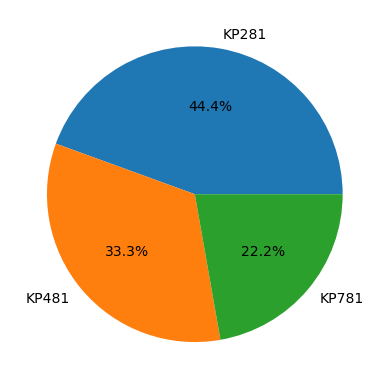

In [34]:
ind = df["Product"].value_counts().index.tolist()
val = df["Product"].value_counts().values.tolist()

plt.pie(val,labels=ind,autopct="%1.1f%%")
plt.show()

#### The Probability of male customer buying a KP781 treadmill is 18.33%
#### The Probability of female customer buying a KP781 treadmill is 3.88%

In [35]:
pd.crosstab(index=df['Income_range'],columns=df["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Income_range,,,,
Income_low,16.666667,8.333333,0.000000,25.000000
Income_mid,12.777778,13.333333,2.777778,28.888889
Income_high,15.000000,11.666667,8.888889,35.555556
Income_rich,0.000000,0.000000,10.555556,10.555556
All,44.444444,33.333333,22.222222,100.000000


#### The mid Range(Income between 44000 & 52000) user has almost equal chance to purchase KP281 and KP481 and very low chances of purchasing KP781

In [36]:
pd.crosstab(index=df['Product'],columns=df['Usage'],margins=True,normalize=True)*100

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.555556,20.555556,12.222222,1.111111,0.000000,0.000000,44.444444
KP481,7.777778,17.222222,6.666667,1.666667,0.000000,0.000000,33.333333
KP781,0.000000,0.555556,10.000000,6.666667,3.888889,1.111111,22.222222
All,18.333333,38.333333,28.888889,9.444444,3.888889,1.111111,100.000000


#### If the usage of the customer is 3 or below 3 then strongly recommend product KP281 / KP481

#### If the usage of the customer is 4 then recommend All of the products

#### If the usage of the customer is 5 or above 5 then strongly recommend product KP781

In [37]:
pd.crosstab(index=df["Usage"],columns=df["Product"],margins=True,normalize="index")*100

Product,KP281,KP481,KP781
Usage,,,
2,57.575758,42.424242,0.000000
3,53.623188,44.927536,1.449275
4,42.307692,23.076923,34.615385
5,11.764706,17.647059,70.588235
6,0.000000,0.000000,100.000000
7,0.000000,0.000000,100.000000
All,44.444444,33.333333,22.222222


#### What is the probability of a person buying KP281 given that its Usage is 3 - 53.62% --> P(KP281 | Usage(3))
#### What is the probability fo a person buying KP781 given that its a Usage is 5 - 70.58% --> P(KP781 | Usage(5))

In [38]:
pd.crosstab(index=df['Product'],columns=df['Age_group'],margins=True,normalize=True)*100

Age_group,Young,Mid_age,Adult,All
Product,,,,
KP281,18.888889,17.777778,7.777778,44.444444
KP481,15.555556,13.333333,4.444444,33.333333
KP781,9.444444,9.444444,3.333333,22.222222
All,43.888889,40.555556,15.555556,100.000000


The probablity of a **young or Mid_aged person** buying **KP781** Product is same

The probablity of buying **KP281** Product is **higher** in any aged_group

In [39]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


#### The features like MaritalStatus and Age are not impacting the user's choice. Hence, It is safe to keep these feature values on low references

In [40]:
pd.crosstab(index = df['Product'], columns=df['Fitness'],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


#### if the fitness of a person is between 1 & 2 recommended him/her KP281 or KP481
#### if the fitness of a person is 3 then strongly recommended him/her KP281 or KP481
#### if the fitness of a person is 4 then recommended him/her any product
#### if the fitness of a person is 5 then recommended him/her KP781



# Some personalised recomendations

In [41]:
# If income is high then which model to be recommended
# income high + education low ?
# income high + education low + usage high ?
# assumption usage and miles seems same
# income high + education low + usage high+ fitness low ?
# income high + education high + usage high+ fitness high ?
# income high + education high + usage high+ fitness low ?
# income high + education high + usage low+ fitness low ?
# income high + education low + usage mid+ fitness low ?
# income mid + education low + usage mid+ fitness high ?
# income low + education mid + usage high+ fitness low ?
